In [1]:
import pandas as pd
import os

# Specify the directory containing the pickle files
directory = '../ressources/final_experiments/result_formal_descriptions_exp'

# Initialize a list or dictionary to hold the DataFrames
dataframes = {}

# Iterate through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pickle'):  # Check for pickle files
        file_path = os.path.join(directory, filename)  # Create full file path
        df = pd.read_pickle(file_path)  # Load the DataFrame from the pickle file
        dataframes[filename] = df  # Store the DataFrame in the dictionary

dataframes.keys()


dict_keys(['llm_evaluated_bt_descriptions.pickle', 'llm_evaluated.pickle'])

In [2]:
df_formal = list(dataframes.values())[0]
df_control = pd.read_pickle('../ressources/final_experiments/result_increasing_size_exp/llm_evaluated_2250.pickle')

In [3]:
from heapq import merge
import pandas as pd

# Assuming df_formal and df_control are already defined
df_formal = list(dataframes.values())[0]
df_control = pd.read_pickle('../ressources/final_experiments/result_increasing_size_exp/llm_evaluated_1575.pickle')

# Check if the indices are the same
if df_formal.index.equals(df_control.index):
    print("The indices of both DataFrames are the same.")
    
    # Merge the DataFrames
    merged_df = pd.merge(df_formal, df_control, left_index=True, right_index=True, suffixes=('_formal', '_control'))
    
    # Rename shared columns by prepending the DataFrame name
    for col in df_formal.columns.intersection(df_control.columns):
        merged_df.rename(columns={col: f"df_formal_{col}"}, inplace=True)
    
    # Display the merged DataFrame
    print(merged_df)
else:
    merged_df = None
    print("The indices of the DataFrames are not the same.")


The indices of both DataFrames are the same.
                                    description_formal  \
0    The environment is a circular arena with radiu...   
1    The environment consists of a circular arena w...   
2    With a radius of 3.44 meters, the circular are...   
3    The arena has a radius of 1.99 m. In this sett...   
4    The area is a rectangle with dimensions 5.11 x...   
..                                                 ...   
245  The environment is constructed as a rectangula...   
246  The environment is constructed as a rectangula...   
247  A rectangular area, with a length of 7.11 mete...   
248  In this setting, a circular arena with a radiu...   
249  The environment consists of a rectangular area...   

                                  configuration_formal  \
0    <?xml version="1.00" ?>\n<config>\n  <swarm-el...   
1    <?xml version="1.00" ?>\n<config>\n  <swarm-el...   
2    <?xml version="1.00" ?>\n<config>\n  <swarm-el...   
3    <?xml version="1.00" 

In [4]:
merged_df.keys()

Index(['description_formal', 'configuration_formal', 'parameters_formal',
       'argos_formal', 'behavior_tree_formal', 'scores_formal',
       'avg_score_formal', 'type_formal', 'lightstype_formal',
       'arenatype_formal', 'robotstype_formal', 'llm_scores_formal',
       'llm_behavior_tree_formal', 'llm_avg_score_formal', 'index',
       'description_control', 'configuration_control', 'parameters_control',
       'argos_control', 'behavior_tree_control', 'scores_control',
       'avg_score_control', 'type_control', 'lightstype_control',
       'arenatype_control', 'robotstype_control', 'llm_scores_control',
       'llm_behavior_tree_control', 'llm_avg_score_control'],
      dtype='object')

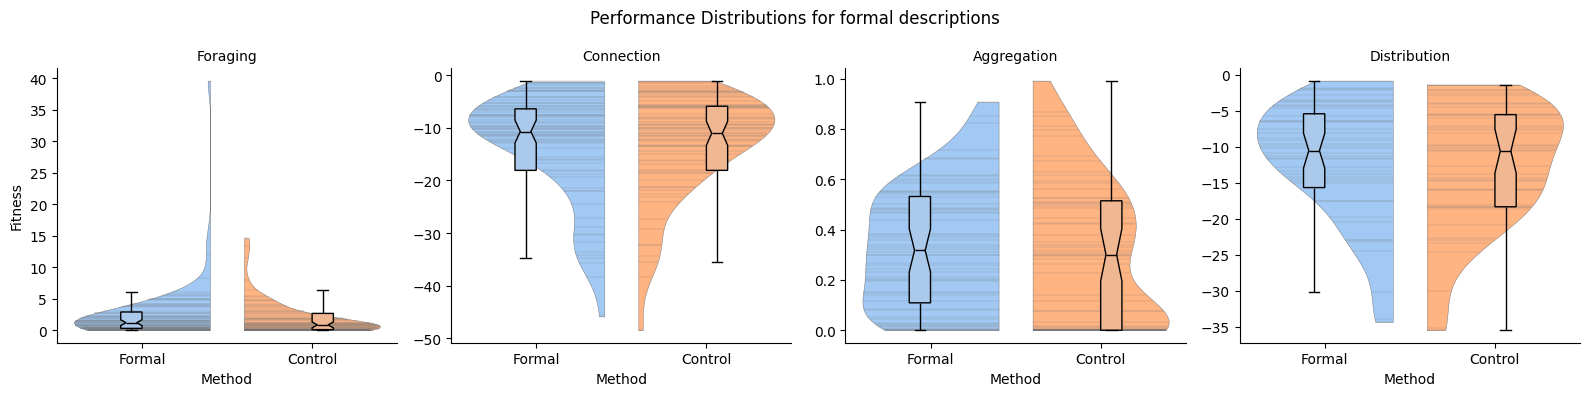

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_violin_boxplot(df, id_var='type', value_vars=['avg_score', 'llm_avg_score'], 
                             score_labels={'avg_score': 'AutoMoDe', 'llm_avg_score': 'LLM'}, 
                             title='Performance Distributions by Mission and Method'):
    """
    Generate a violin and box plot for the given DataFrame.

    Parameters:
    - df: DataFrame containing the data to plot.
    - id_var: Column name to use as identifier variable (default is 'type').
    - value_vars: List of column names to melt (default is ['avg_score', 'llm_avg_score']).
    - score_labels: Dictionary to map score variable names to display labels.
    - title: Title of the plot.
    """
    # Melt the DataFrame
    df_melted = df.melt(id_vars=[id_var], value_vars=value_vars, 
                         var_name='Score Type', value_name='Score')

    # Create a FacetGrid with violin plots
    g = sns.FacetGrid(df_melted, col=id_var, height=4, aspect=1, sharex=True, sharey=False)
    g.map_dataframe(sns.violinplot, x='Score Type', y='Score', hue='Score Type', 
                    split=True, inner='stick', density_norm='area', 
                    palette="pastel", cut=0, dodge=False, native_scale=True, 
                    legend="auto", saturation=1.0, linewidth=0.33)

    # Overlay notched boxplots
    g.map_dataframe(sns.boxplot, x='Score Type', y='Score', hue='Score Type', 
                    dodge=True, width=0.25, palette="pastel", 
                    fliersize=0, notch=True, linewidth=1.0, linecolor="black")

    # Set titles and labels
    g.set_titles(col_template='{col_name}')
    g.set_axis_labels('Method', 'Fitness')

    # Rename the x-tick labels
    for ax in g.axes.flat:
        # Get the current tick positions
        ticks = ax.get_xticks()
        # Set the new tick labels
        ax.set_xticks(ticks)
        ax.set_xticklabels([score_labels.get(label, label) for label in value_vars])

    # Add a title to the figure
    g.figure.suptitle(title)
    g.tight_layout()
    plt.show()

# Example usage:
# generate_violin_boxplot(df_cleaned)

generate_violin_boxplot(merged_df, 
                        id_var='type_formal', 
                        value_vars=['llm_avg_score_formal', 'llm_avg_score_control'], 
                        score_labels={'llm_avg_score_formal': 'Formal', 'llm_avg_score_control': 'Control'}, 
                        title='Performance Distributions for formal descriptions')

In [6]:
# Create a pivot table with min, max, mean, and median
pivot_table = merged_df.pivot_table(
    index='type_formal',
    values=['llm_avg_score_formal', 'llm_avg_score_control'],  # Specify the columns to aggregate
    aggfunc=['min', 'max', 'mean', 'median']  # Include median in the aggregation functions
)

# Display the pivot table
pivot_table

min                                        max  \
             llm_avg_score_control llm_avg_score_formal llm_avg_score_control   
type_formal                                                                     
Aggregation                0.00000              0.00000              0.990909   
Connection               -48.45403            -45.82188             -1.060899   
Distribution             -35.45303            -34.27484             -1.368099   
Foraging                   0.00000              0.00000             14.600000   

                                                   mean                       \
             llm_avg_score_formal llm_avg_score_control llm_avg_score_formal   
type_formal                                                                    
Aggregation              0.906667              0.307450             0.330752   
Connection              -1.180408            -13.242303           -13.546479   
Distribution            -0.812688            -12.842702           -12.082535   
Foraging                39.600000              1.944595             2.593333   

                            median                       
             llm_avg_score_control llm_avg_score_formal  
type_formal                                              
Aggregation               0.300000             0.317320  
Connection              -11.044019           -10.701535  
Distribution            -10.579020           -10.515614  
Foraging                  0.850000             1.200000

The indices of both DataFrames are the same.
                                    description_formal  \
0    The environment is a circular arena with radiu...   
1    The environment consists of a circular arena w...   
2    With a radius of 3.44 meters, the circular are...   
3    The arena has a radius of 1.99 m. In this sett...   
4    The area is a rectangle with dimensions 5.11 x...   
..                                                 ...   
245  The environment is constructed as a rectangula...   
246  The environment is constructed as a rectangula...   
247  A rectangular area, with a length of 7.11 mete...   
248  In this setting, a circular arena with a radiu...   
249  The environment consists of a rectangular area...   

                                  configuration_formal  \
0    <?xml version="1.00" ?>\n<config>\n  <swarm-el...   
1    <?xml version="1.00" ?>\n<config>\n  <swarm-el...   
2    <?xml version="1.00" ?>\n<config>\n  <swarm-el...   
3    <?xml version="1.00" 

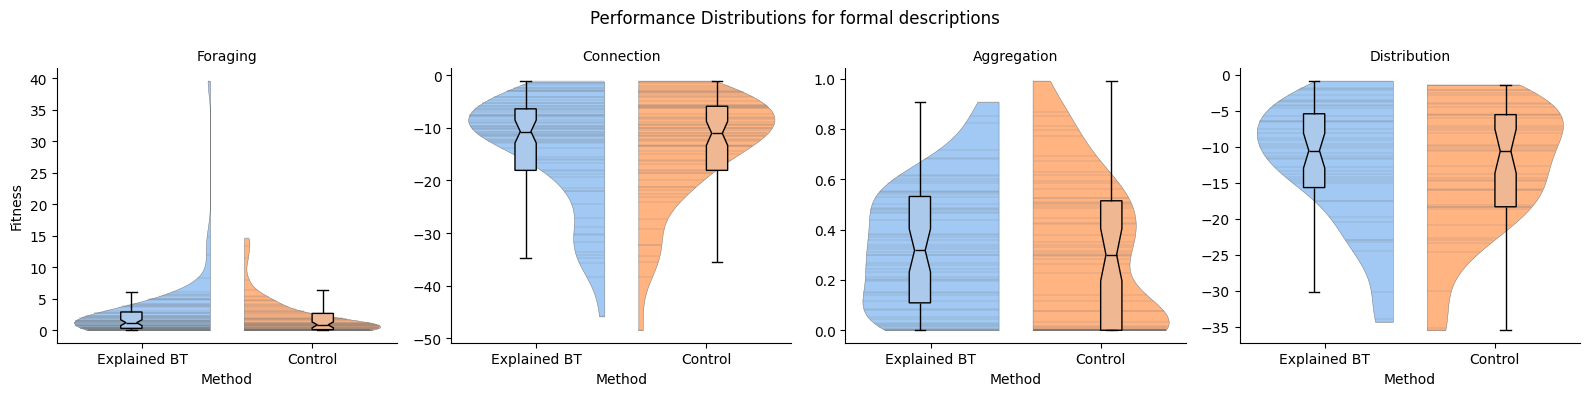

In [7]:
df_formal = pd.read_pickle('../ressources/final_experiments/result_formal_descriptions_exp/llm_evaluated_bt_descriptions.pickle')
df_control = pd.read_pickle('../ressources/final_experiments/result_increasing_size_exp/llm_evaluated_1575.pickle')

from heapq import merge
import pandas as pd

# Assuming df_formal and df_control are already defined
df_formal = list(dataframes.values())[0]
df_control = pd.read_pickle('../ressources/final_experiments/result_increasing_size_exp/llm_evaluated_1575.pickle')

# Check if the indices are the same
if df_formal.index.equals(df_control.index):
    print("The indices of both DataFrames are the same.")
    
    # Merge the DataFrames
    merged_df = pd.merge(df_formal, df_control, left_index=True, right_index=True, suffixes=('_formal', '_control'))
    
    # Rename shared columns by prepending the DataFrame name
    for col in df_formal.columns.intersection(df_control.columns):
        merged_df.rename(columns={col: f"df_formal_{col}"}, inplace=True)
    
    # Display the merged DataFrame
    print(merged_df)
else:
    merged_df = None
    print("The indices of the DataFrames are not the same.")
generate_violin_boxplot(merged_df, 
                        id_var='type_formal', 
                        value_vars=['llm_avg_score_formal', 'llm_avg_score_control'], 
                        score_labels={'llm_avg_score_formal': 'Explained BT', 'llm_avg_score_control': 'Control'}, 
                        title='')

In [8]:
# Create a pivot table with min, max, mean, and median
pivot_table = merged_df.pivot_table(
    index='type_formal',
    values=['llm_avg_score_formal', 'llm_avg_score_control'],  # Specify the columns to aggregate
    aggfunc=['min', 'max', 'mean', 'median']  # Include median in the aggregation functions
)

# Display the pivot table
pivot_table

min                                        max  \
             llm_avg_score_control llm_avg_score_formal llm_avg_score_control   
type_formal                                                                     
Aggregation                0.00000              0.00000              0.990909   
Connection               -48.45403            -45.82188             -1.060899   
Distribution             -35.45303            -34.27484             -1.368099   
Foraging                   0.00000              0.00000             14.600000   

                                                   mean                       \
             llm_avg_score_formal llm_avg_score_control llm_avg_score_formal   
type_formal                                                                    
Aggregation              0.906667              0.307450             0.330752   
Connection              -1.180408            -13.242303           -13.546479   
Distribution            -0.812688            -12.842702           -12.082535   
Foraging                39.600000              1.944595             2.593333   

                            median                       
             llm_avg_score_control llm_avg_score_formal  
type_formal                                              
Aggregation               0.300000             0.317320  
Connection              -11.044019           -10.701535  
Distribution            -10.579020           -10.515614  
Foraging                  0.850000             1.200000

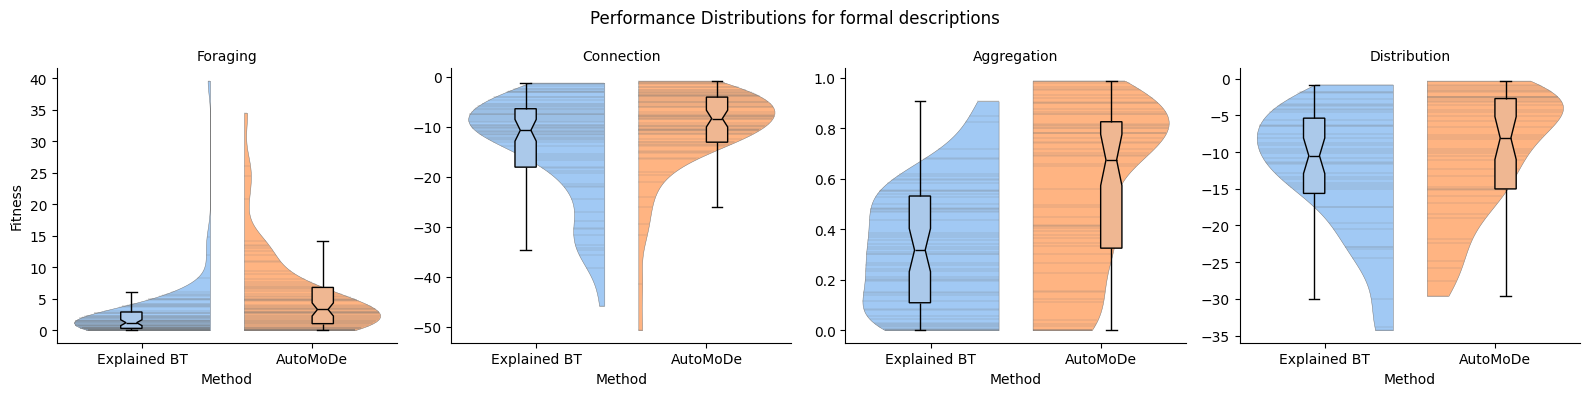

In [9]:
generate_violin_boxplot(df_formal, 
                        id_var='type', 
                        value_vars=['llm_avg_score', 'avg_score'], 
                        score_labels={'llm_avg_score': 'Explained BT', 'avg_score': 'AutoMoDe'}, 
                        title='')